![](img/logo.png)

# Logistic regression
## Yoav Ram

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

sns.set(
    style='ticks',
    context='talk',
    palette='Set1'
)

/var/folders/vc/qm7741c57dsg9f7wyrtrdrrm0000gq/T/ipykernel_17094/388007462.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[![scikit-learn logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)](http://scikit-learn.org/)

*Scikit-learn* is a Python package for machine learning:

- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

We will do [one of the many tutorials](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html) from the *scikit-learn* website. 

All estimators in *scikit-learn* implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

Most often, `y` is a 1D array of length `n_samples`.

The wine dataset contains 13 features and 3 target labels:

Features:
 - Alcohol
 - Malic acid
 - Ash
 - Alcalinity of ash  
 - Magnesium
 - Total phenols
 - Flavanoids
 - Nonflavanoid phenols
 - Proanthocyanins
 - Color intensity
 - Hue
 - OD280/OD315 of diluted wines
 - Proline

Classes (not very informative...):
 - class_0
 - class_1
 - class_2

In [13]:
X, y = sklearn.datasets.load_wine(return_X_y=True)

**Perform a train-test split and then train and score a classifier.**

You can use the KNN classifier we saw above, or you can experiment with [another classifier](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) -- some other classifiers are imported below.

In [14]:
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Test accuracy: 0.9830508474576272


# Recognizing handwritten digits 

Learning to recognize handwritten digits with a K-nearest neighbors classifier, inspired by [IPython Interactive Computing and Visualization Cookbook](http://ipython-books.github.io/).

Start by looking at the data.

What do we have here?

In [5]:
X, y = sklearn.datasets.load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

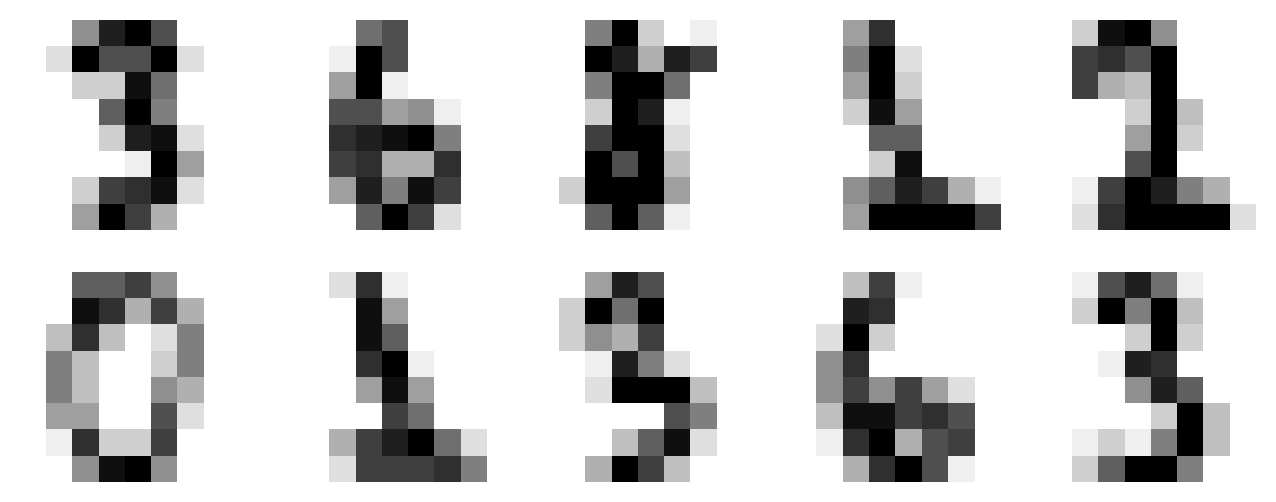

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
for ax in axes.flat:
    idx = np.random.choice(np.arange(X.shape[0]))
    ax.matshow(X[idx].reshape(8, 8), cmap='gray_r')
    ax.set(xticks=[], yticks=[])
sns.despine(left=True, bottom=True)

We can also look at the average image for each class, this should tell us if there is enonugh signal in the data to be learned from. 

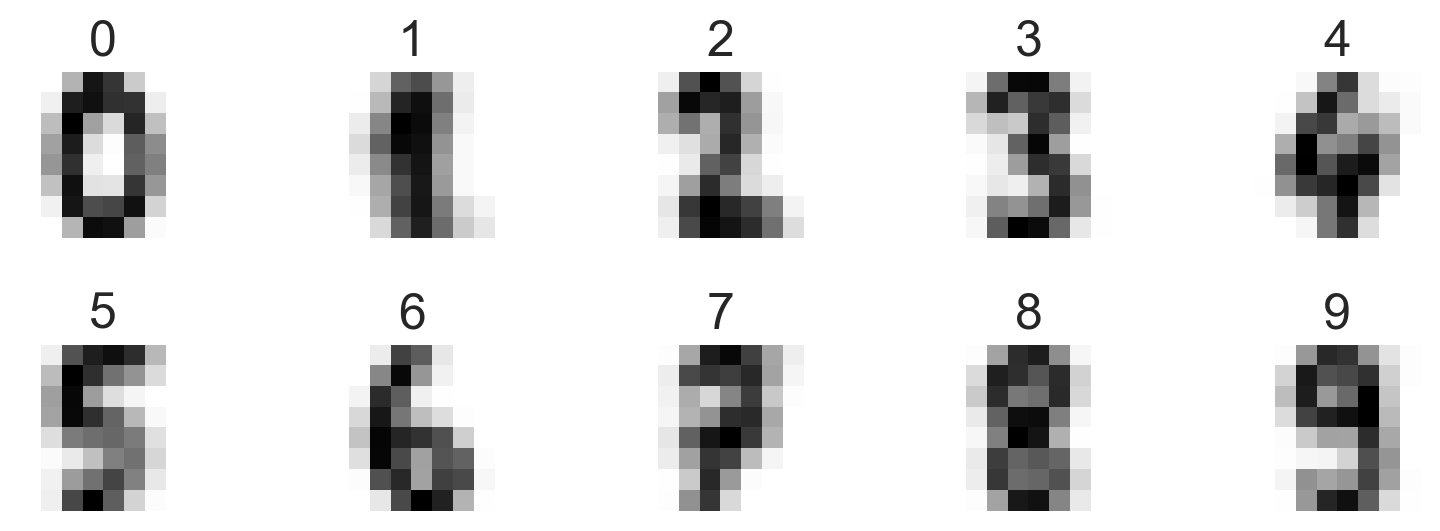

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
for k, ax in enumerate(axes.flat):
    idx = y == k 
    X_k_mean = X[idx].mean(axis=0) 
    ax.imshow(X_k_mean.reshape((8, 8)), cmap='gray_r')
    ax.set(title=k, xticks=[], yticks=[])
sns.despine(bottom=True, left=True)
fig.tight_layout()

OK, so lets split the data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

# Logistic regression

Can we do any better with a different classifier?
Let's try the logistic regression classifer.
In this model, we try to estimate the probability $\hat{y}_k$ that a data sample (image) belongs to class $k$ (digit $k$):
$$
z_k = a_{1,k} x_1 + \ldots + a_{m,k} x_m $$$$
\hat{y}_k = \frac{e^{z_k}}{\sum_j{e^{z_j}}} $$$$
$$
where $x_j$ is pixel $j$ and $a_{j,k}$ is the increase in favor of class $k$ when pixel $j$ is dark.

In this case the loss function we minimize is *not* the sum of residual squares, but rather the **cross-entropy**:
$$
loss(p, y) = \sum_{i=1}^{n}{\sum_{k=0}^{9}{y_{i,k} \log{p_{i,k}}}}
$$
where $i$ is the image index ($n$ images overall), $k$ is the digit (i.e. class), $y_{i,k}=1$ if image $i$ is of digit $k$ and $y_{i,k}=0$ otherwise, and $\hat{y}_{i,k}$ is the model prediction about the probability that image $i$ is of digit $k$.

In [8]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print("Test accuracy: {:.4f}".format(logistic.score(X_test, y_test)))

Test accuracy: 0.9478


## How does it work?

The figure below plots the values of the coefficeints $a_{j,k}$: for each digit $k$, there is one plot that shows the effect of each pixel. 

For example, in the top left plot pixels shown in red decrease the probability for a 0 class when dark, and pixels in blue increase the probability for a 0 class when dark.

(10, 64)


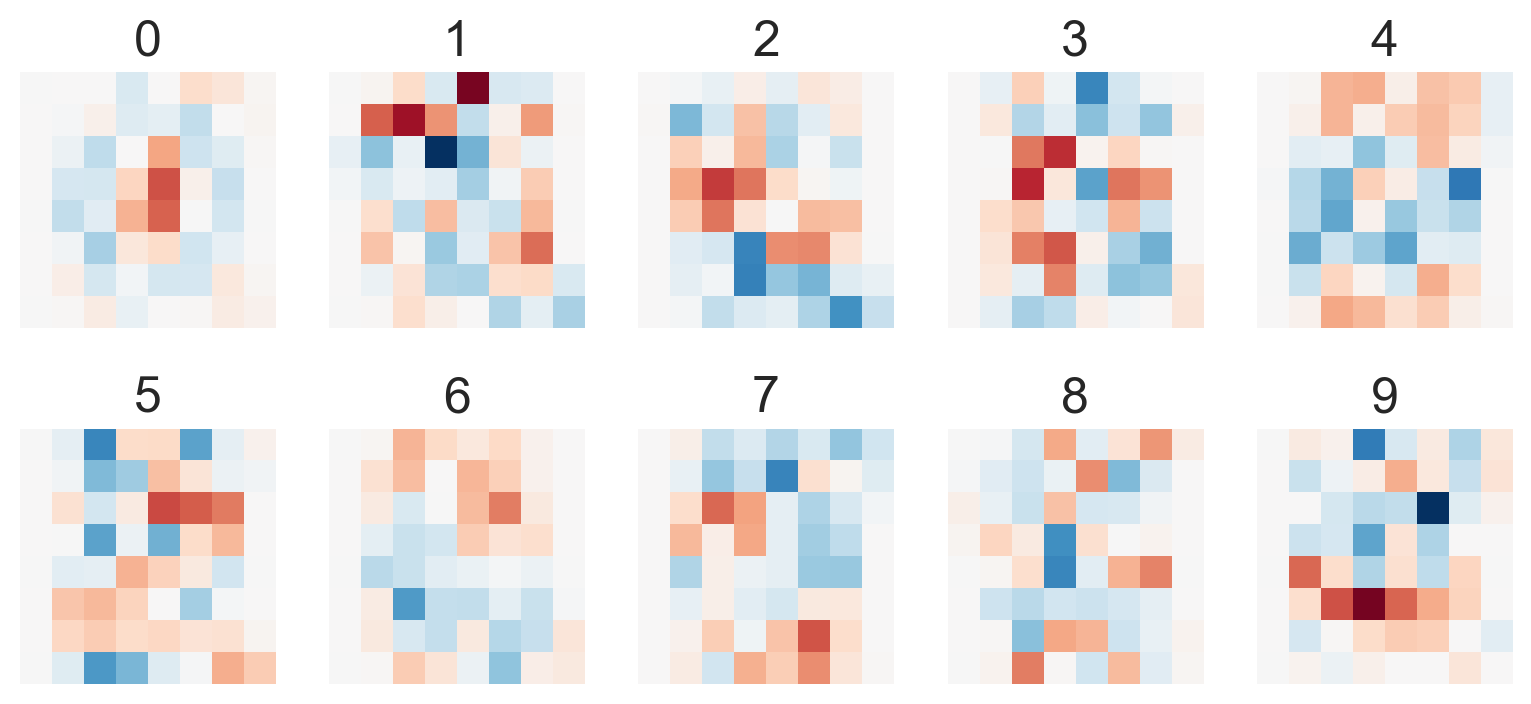

In [10]:
a = logistic.coef_
print(a.shape)
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for k, ax in enumerate(axes.flat):
    ax.imshow(a[k, :].reshape((8, 8)), cmap='RdBu', vmin=-0.6, vmax=0.6)
    ax.set(title=k, xticks=[], yticks=[])
sns.despine(bottom=True, left=True)
fig.tight_layout()

## Confusion matrix

We can use a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to understand where the confusion is: which classes are mistaken for which?

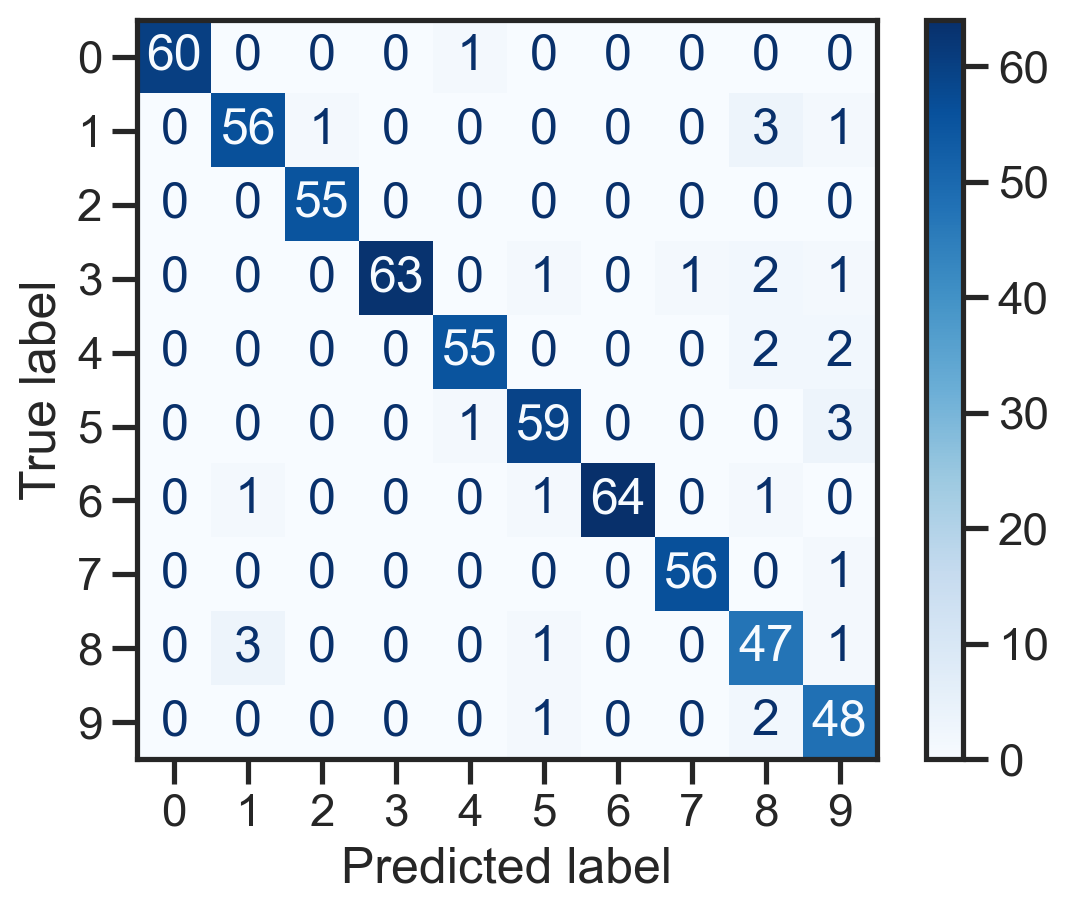

In [12]:
ConfusionMatrixDisplay.from_estimator(
    logistic,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
);

We can see that the most common mistake is that 8 are classified as 1, or sometimes 3.

## Exercise: neural network

Try other classifiers on the digits dataset.
For example, how about a neural network from `sklearn.neural_network`?

In [27]:
from sklearn import neural_network

Test accuracy: 0.9815


# Exercise: Wine

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)